# Imports

In [1]:
import numpy as np
from scipy.spatial import ConvexHull
from scipy.spatial import distance
import matplotlib.pyplot as plt
import networkx as nx
from itertools import chain, combinations
import pdb

%matplotlib inline

# Points

In [4]:
# points = np.random.rand(30, 2)   # 30 random points in 2-D

bookmarkJSON = {"maps":{"idOthers":{"label":"Others","state":1,"bkmrk":{}}},"portals":{"id1436081056637":{"label":"0A2198FE: Inwood Recharge","state":0,"bkmrk":{"id1436081177062":{"guid":"76cbeac0b8884a61999911370f3ef7b3.16","latlng":"40.862411,-73.920096","label":"204th Graffiti"},"id1436081203050":{"guid":"d45f78c7330f415295dad5a2a88c1b2d.16","latlng":"40.864628,-73.918741","label":"207 St. Station"},"id1436081219785":{"guid":"27fad55af4574b46a6dcc74d35251773.16","latlng":"40.869281,-73.915268","label":"215 St Station"},"id1436081249244":{"guid":"1c66a05a92cb40a9aa1d13517c3068d2.16","latlng":"40.869941,-73.915052","label":"215 Street Subway Station"},"id1436081269757":{"guid":"1537b020c1594d378e8283ce7b8b5d89.16","latlng":"40.87446,-73.909914","label":"225 St Station Train"},"id1445475245664":{"guid":"14419aaeb5b34d6983e156e19854bb12.16","latlng":"40.864574,-73.929394","label":"Aardvark Sculpture"},"id1436083329163":{"guid":"c3eddf56a4bb416d8d0ba48a043e902f.16","latlng":"40.866229,-73.924762","label":"Academy Street Art"},"id1436081282965":{"guid":"e27db2c68cc2465a99e4c9e7a3632b21.16","latlng":"40.868224,-73.922308","label":"Alexander's Garden"},"id1440854735540":{"guid":"0790aca399c2441ca74340868ee96d15.16","latlng":"40.865499,-73.928236","label":"Anne Loftus Playground"},"id1436081295648":{"guid":"5f86f6d37d8c4db88eb0319d90f29284.16","latlng":"40.864711,-73.918982","label":"Barber "},"id1436083319902":{"guid":"90bb29efc45c43d2aac4a0097f13e027.16","latlng":"40.866656,-73.923711","label":"Boat Medallion"},"id1436081401719":{"guid":"5174cf82814648539e06bf55f3fb7b2a.16","latlng":"40.869955,-73.917582","label":"Bruce's Garden"},"id1436081439355":{"guid":"b9d690fa1a9a430fbf61ff40310892b2.16","latlng":"40.875367,-73.909051","label":"Carolina Baptist Church"},"id1436083315745":{"guid":"29ef421b4da9426f8a868129c0dbc8e3.16","latlng":"40.866979,-73.922238","label":"Castle Black Beehive"},"id1436081460351":{"guid":"51294cc16211439291f9fbe95bc922f6.16","latlng":"40.868301,-73.918366","label":"Castle Black Lion"},"id1436081536916":{"guid":"f27206297cc045c7871e3bbbf4447108.16","latlng":"40.868246,-73.92018","label":"Church of Good Shepherd"},"id1436081555126":{"guid":"f547f7f594f34f0db48b01a701cd552d.16","latlng":"40.863069,-73.919757","label":"Church of Saint Jude"},"id1440851892601":{"guid":"3c78d65a41024ca999a0f7b4c1dc5f0f.16","latlng":"40.86405,-73.925274","label":"Cloud City Mural"},"id1436081578516":{"guid":"1bb87d6614e647289bf6ebb53e9505ff.16","latlng":"40.86902,-73.916993","label":"College"},"id1436083293069":{"guid":"8499cad992434f7c9373d6e02220de56.16","latlng":"40.873607,-73.918067","label":"Columbia Boathouse"},"id1436081592358":{"guid":"d3b8c29677aa4017b332d7859dea9da2.16","latlng":"40.872244,-73.916094","label":"Columbia Stadium Gates"},"id1436081606034":{"guid":"ce6663098aad44639d5be272c385115d.16","latlng":"40.86621,-73.918347","label":"Cone Mural"},"id1436081619761":{"guid":"c8c1d62cd4b94f82b71e1e403f3c29a3.16","latlng":"40.86857,-73.921463","label":"Cooper St Mural"},"id1436083285538":{"guid":"6c4b409141774deb8b6aaea3e9afcec8.16","latlng":"40.873866,-73.917486","label":"Dick Savitt Tennis Center"},"id1436081636248":{"guid":"9f84864f5c4f48c399b3bc752a33c3d4.16","latlng":"40.864674,-73.919485","label":"Dig This Mural"},"id1436081649236":{"guid":"be5d7e2dce184f3681e4bbcc44b3baed.16","latlng":"40.874053,-73.909239","label":"Duarte Statue"},"id1436081662827":{"guid":"c7adbe65efd445f99e9a282ba19a7733.12","latlng":"40.867262,-73.923","label":"Dyckman Farmhouse Museum"},"id1440854666328":{"guid":"747082f4897a4d60a886a8755fb45cf1.16","latlng":"40.860579,-73.925597","label":"Dyckman Street Station"},"id1436081676502":{"guid":"b3b4838187df4e488c5f086386b97f4d.16","latlng":"40.869418,-73.922118","label":"Emerson Playground"},"id1436081690819":{"guid":"8731ad8ea53646218bd8fcabf19ac6b1.16","latlng":"40.869893,-73.915561","label":"Faces on Face Mural"},"id1436081707204":{"guid":"e96576dae3514070b03a74ecaa65f149.16","latlng":"40.869423,-73.915564","label":"Father Time"},"id1436083296708":{"guid":"0467135003ba4df690681ca5583c09ad.16","latlng":"40.872602,-73.921309","label":"Forest Restoration Sign"},"id1440853156288":{"guid":"241253aaff234a86819a00be65694128.16","latlng":"40.865803,-73.929862","label":"Fort Tryon Park"},"id1440852378084":{"guid":"facc926858ed4c38978b02a181c30ee2.16","latlng":"40.865323,-73.92818","label":"Fort Tryon Park"},"id1440852343401":{"guid":"b918c319ed2747b39898044f8b40a19b.16","latlng":"40.864974,-73.928845","label":"Fort Tryon Play Area"},"id1436081869197":{"guid":"81df69e66bc14408afc6a11d0b34962b.16","latlng":"40.867824,-73.930212","label":"Fort Washington Park"},"id1436081849483":{"guid":"caecfb23810b4a8880ae610d3952835b.16","latlng":"40.867053,-73.927125","label":"Fountain on Seaman Ave"},"id1436083281515":{"guid":"eeb933102e964810963fb09751c68a01.16","latlng":"40.867428,-73.921741","label":"Four Eyed Lion"},"id1436081910674":{"guid":"ce0fc2b8921c41739489c86a7283937c.16","latlng":"40.867344,-73.926723","label":"Gargoyle Statue"},"id1444213639809":{"guid":"a5c68fd48652457a95e923785cba758a.16","latlng":"40.864119,-73.928419","label":"Golden Eagle Plates"},"id1436081943521":{"guid":"5e6b8e9d8bec4c02a498368943d7f9f4.16","latlng":"40.871186,-73.913661","label":"Grand Theft Auto Mural"},"id1436081958474":{"guid":"ce6d12aa1ea1481bbe24d481740bf898.16","latlng":"40.876083,-73.923811","label":"Henry Hudson Bridge"},"id1444213775035":{"guid":"4411ab8569b64136997d41ac52fe447e.16","latlng":"40.85881,-73.923048","label":"Highbridge Park"},"id1436083337147":{"guid":"6b56fc94b5c34f5db1a59979eb42fefe.16","latlng":"40.866586,-73.92668","label":"Holy Trinity Episcopal Church"},"id1436082079435":{"guid":"f6469ce1260444f9addd7a4b55af9efc.16","latlng":"40.871049,-73.921674","label":"Homer's Run "},"id1436082095213":{"guid":"fae015c9a9d74f7e82217fd255c046d0.16","latlng":"40.869824,-73.916185","label":"Hong Mural"},"id1436083289459":{"guid":"c9d56d10b2974ddf926628275b38bf0d.16","latlng":"40.873832,-73.91774","label":"Horace E. Daveport Class 1929"},"id1436083975973":{"guid":"41416be363544a24bc692a8af39e5e16.16","latlng":"40.866271,-73.921721","label":"Iglesia Adventista Del 7mo DIA"},"id1440852576416":{"guid":"b7e476d662a54175a224ad07c97deb1e.16","latlng":"40.863943,-73.926389","label":"Iglesia Cristiana Church"},"id1436082118628":{"guid":"f8cef2105ff34679b807c11cc85c2123.16","latlng":"40.863672,-73.919204","label":"In Memory"},"id1436082131612":{"guid":"12dda8dd3413487b9273e7e4ea412840.16","latlng":"40.871782,-73.919893","label":"Indian Road Playground "},"id1436083341701":{"guid":"ebffadcd874d4bdca184d94c48eb60d1.16","latlng":"40.867349,-73.928038","label":"Inwood Hill Park"},"id1436082150147":{"guid":"e979c340763c4c518034bbaf3b2dcc5c.16","latlng":"40.867989,-73.927118","label":"Inwood Hill Park"},"id1436082170060":{"guid":"2205e1b538ef43299672e6b9a8b530b4.16","latlng":"40.873109,-73.91879","label":"Inwood Hill Park"},"id1436082173539":{"guid":"bd681759fbf24e00864b29b9a25e4b1b.16","latlng":"40.870084,-73.921009","label":"Inwood Hill Park"},"id1440852727944":{"guid":"f6106d3da6c843e4ad987912d2824837.16","latlng":"40.8701,-73.922285","label":"Inwood Hill Park Tennis Courts"},"id1436082394221":{"guid":"0ab9319403864190875739b985cf7bb4.16","latlng":"40.871286,-73.919098","label":"Isham Gardens"},"id1436082305797":{"guid":"99c353b019e14485b98265cc90eb6a15.16","latlng":"40.869168,-73.917479","label":"Isham Park"},"id1436082312642":{"guid":"c87b343c267f467886b3392ffc765a3e.16","latlng":"40.869238,-73.919735","label":"Isham Park "},"id1436082320884":{"guid":"d9611f74347a4e5297eb145c79dc9a7e.16","latlng":"40.870657,-73.919259","label":"Isham Park Lower Entrance"},"id1436083276779":{"guid":"a158916097f24e30ae39d3be86b0afb0.16","latlng":"40.868447,-73.919259","label":"Isham Park South Broadway"},"id1444213968913":{"guid":"51f9db63f69b432c8633e4a83cca5315.16","latlng":"40.863664,-73.927068","label":"Jesus Saves Church"},"id1436083270678":{"guid":"e499e2503a734bb28506203941646bcc.16","latlng":"40.874102,-73.917842","label":"Kayak And Canoe Launch"},"id1440853062084":{"guid":"0ac8e52c9ec94fdeaff19c267c9b5d89.16","latlng":"40.862571,-73.922754","label":"Live Free Mural"},"id1436082340785":{"guid":"59ce41d2352544dc9e8dc2c882ea681a.16","latlng":"40.86825,-73.925251","label":"Lorraine Court"},"id1436082352510":{"guid":"90709bd04c344c9493e35449f13b09ee.16","latlng":"40.866197,-73.927722","label":"Mama Sushi"},"id1440853025993":{"guid":"9e84736ef7ef4a48b54c78fa80946105.16","latlng":"40.862962,-73.920601","label":"Monsignor Kett Playground"},"id1436084002922":{"guid":"3b3641bc8a4048cfb0e3500247010e1f.16","latlng":"40.865964,-73.923133","label":"Mt. Washington Presbyterian Church "},"id1436082366546":{"guid":"932591e81df444f18edce8f214a4d1f2.16","latlng":"40.870903,-73.913964","label":"MTA Sign"},"id1436082377213":{"guid":"bbf9e7a1f9a1405c8db3446b3f0c6201.16","latlng":"40.872895,-73.917737","label":"Muscota Marsh Park"},"id1436082386155":{"guid":"af3b9a7b95484f6fbfd16efc723006f7.16","latlng":"40.871583,-73.914381","label":"New millennium campbell sport recreation center"},"id1436083332768":{"guid":"4d8baee038504608926d1fe8313828c6.12","latlng":"40.865895,-73.925905","label":"New York Public Library - Inwood Branch"},"id1445475250885":{"guid":"d4bb0b0d23b0422d8eeca7c728c620c9.16","latlng":"40.863582,-73.928065","label":"Our Lady Queen of Martyrs Church"},"id1436082423153":{"guid":"2e171f152ac344ef877161e9a08d2426.16","latlng":"40.866977,-73.928573","label":"Payson Playground"},"id1436083346209":{"guid":"37d8300ec4b0490e854f7f35427f5779.16","latlng":"40.867346,-73.929108","label":"Payson Playground Cabin"},"id1436082472067":{"guid":"b566274121054256936c27e50fd6a72a.16","latlng":"40.864197,-73.918496","label":"Prissy"},"id1444214130865":{"guid":"7e2667d2bc384473aa15610c1bc5f99f.16","latlng":"40.865749,-73.927685","label":"R.I.N.G. Garden"},"id1436082490518":{"guid":"6cf14e93dc384c32910e2ac1a0104ffd.16","latlng":"40.864891,-73.918955","label":"Ree Graffiti at 10 Ave"},"id1436082503173":{"guid":"0366e5fd149149c3b18246dc4300d7db.16","latlng":"40.865296,-73.91933","label":"Roof BANDIT Graffiti "},"id1444214164253":{"guid":"1087ae74aea24e709c9d9ec00a1f9c6f.16","latlng":"40.862592,-73.920577","label":"Sealion Statue"},"id1436082516933":{"guid":"fa3fb421430447bea453753abf23b043.16","latlng":"40.859522,-73.9224","label":"Sherman Park"},"id1436083258880":{"guid":"492a06af29614ffbbe21265be5c0eab1.16","latlng":"40.873512,-73.923694","label":"Shorakkopoch"},"id1436082543620":{"guid":"aa81162d9bbd47d8a2c336e72edcf54e.16","latlng":"40.86853,-73.920186","label":"The Capuchin Franciscans Statue"},"id1436082561711":{"guid":"6d96eed6ff65426b8c7a4b1e16b2c7a7.11","latlng":"40.866077,-73.929535","label":"The Church of Jesus Christ"},"id1436083352123":{"guid":"e402f49e4d2949ab8175167796cbe470.12","latlng":"40.867702,-73.922804","label":"The Hessian Military Hut"},"id1436083323564":{"guid":"284c86a6cf474d6d8948167cc610f7ad.16","latlng":"40.866723,-73.924374","label":"The Stack"},"id1436082574221":{"guid":"88e0915d99754473a97c508c4e3e86d6.16","latlng":"40.86541,-73.921922","label":"Tree Shadow"},"id1440852888744":{"guid":"2e82e416016b42d0aaa6fd1bc55dd824.16","latlng":"40.864958,-73.927906","label":"Trying Public House Mural"},"id1436082586647":{"guid":"d1fbeb14a45e41569e672e983a67bcd4.16","latlng":"40.869691,-73.915213","label":"Turtles"},"id1436082646313":{"guid":"6d7004606e1c4ebaba44910a985506cc.12","latlng":"40.877309,-73.906197","label":"US Post Office, Bdwy, Bronx, NY"},"id1436082659356":{"guid":"383d266255fe46dbbd36f380efd842f7.12","latlng":"40.866056,-73.922796","label":"US Post Office, Vermilyea Ave, New York"},"id1436082677318":{"guid":"333e0f28e4d449489f3b4432da7c0b62.16","latlng":"40.871378,-73.913484","label":"V&S Mural the Sting is Real"},"id1436082692289":{"guid":"eea501d04d8242fcbb39edb5162c532a.16","latlng":"40.865936,-73.918093","label":"WataahWall"},"id1436082705656":{"guid":"dfb173e677524d80b3587ced97e1a6d6.16","latlng":"40.874589,-73.910658","label":"Welcome To The Bronx Mural"},"id1436082726199":{"guid":"bab976ede27643e98b86dc3eb190a5ac.16","latlng":"40.87287,-73.911575","label":"Yoshi Mural"},"id1436082748693":{"guid":"e4e38d1607044994ad409b3eb6bc7875.12","latlng":"40.866657,-73.929252","label":"Zipcar-270 Dyckman Street"},"id1436083360193":{"guid":"42550ab7815d4a7389a11c67ca134b2f.12","latlng":"40.86785,-73.916895","label":"Zipcar-3976 10th Avenue"}}},"id1436083228889":{"label":"To Get","state":0,"bkmrk":{"id1436083254414":{"guid":"aaac81351f7d40dd8360a7793f0bbd57.16","latlng":"40.875549,-73.927594","label":"Drone Graffiti"},"id1436083263367":{"guid":"a48b0900a55d46049f3e60c694d0c548.16","latlng":"40.874221,-73.920161","label":"Inwood Hill Nature Center"},"id1436084327544":{"guid":"41bc9baf78684e95bffae5bc57e86566.16","latlng":"40.865874,-73.919147","label":"Fountain"},"id1436083301292":{"guid":"f47e4d743f004fa2b6c0b6a0d903d73f.16","latlng":"40.86985,-73.924415","label":"Inwood Hill Park Forest Restoration"},"id1445336527369":{"guid":"ce7565d3122c45108b85ce0c372b18f3.16","latlng":"40.868688,-73.931721","label":"Fort Washington Park"}}},"idOthers":{"label":"Others","state":1,"bkmrk":{}},"id1446382806673":{"label":"Convex Hull","state":0,"bkmrk":{}},"id1446382847766":{"label":"Folder","state":1,"bkmrk":{}}}}

class BookmarkReader(object):
    """A BookmarkReader reads a bookmark JSON object copied from
    BookmarkOpts in the Ingress Intel Map."""
    
    def __init__(self,bookmarkJSON):
        self.bookmarkJSON = bookmarkJSON
        
        portals = bookmarkJSON['portals']
        for key, value in portals.items():
            if value['label'] == '0A2198FE: Inwood Recharge':
                self.portalsJSON = portals[key]['bkmrk']
                break
                
        graph = nx.Graph()
        node_positions = {}
        node_labels = {}
        for key, value in self.portalsJSON.items():
            label = self.portalsJSON[key]['label']
            latlng = self.portalsJSON[key]['latlng'].split(',')
            latitude = float(latlng[0])
            longitude = float(latlng[1])
            graph.add_node(key, label = label, latitude = latitude, longitude = longitude)
            node_positions[key] = (longitude, latitude * 5.0)
            node_labels[key] = label
        self.graph = graph
        self.node_positions = node_positions
        self.node_labels = node_labels
        
        point_array = np.asarray([point for point in self.node_positions.values()])
        self.point_array = point_array
    
#    def rng(self):
    
    def draw(self):
        nx.draw(
            self.graph,
            pos = self.node_positions,
            labels = self.node_labels,
            node_shape = '.'
        )

wright = BookmarkReader(bookmarkJSON)
points = wright.point_array

# Graph

In [5]:
G = nx.Graph()
it = np.nditer(points, flags=['multi_index'])
while not it.finished:
    index = it.multi_index[0]
    G.add_node(index,pos=(points[index,0],points[index,1]),label=index)
    it.iternext()
    it.iternext()
pos = nx.get_node_attributes(G,'pos')

# Hull

In [6]:
hull = ConvexHull(points)
for simplex in hull.simplices:
    G.add_edge(simplex[0],simplex[1])

# RNG Edges

In [7]:
for i in G.nodes():
    for j in [j for j in G.nodes() if j != i]:
        closerNeighborFound = False
        distij = distance.euclidean(pos[i],pos[j])
        for k in [k for k in G.nodes() if k != i and k != j]:
            distik = distance.euclidean(pos[i],pos[k])
            distjk = distance.euclidean(pos[j],pos[k])
            if distik < distij and distjk < distij:
                closerNeighborFound = True
                break
        if not closerNeighborFound:
            G.add_edge(i,j)

# Draw

{0: <matplotlib.text.Text at 0x108f55978>,
 1: <matplotlib.text.Text at 0x108f14eb8>,
 2: <matplotlib.text.Text at 0x108ee7630>,
 3: <matplotlib.text.Text at 0x108ef67b8>,
 4: <matplotlib.text.Text at 0x108ee39e8>,
 5: <matplotlib.text.Text at 0x108ecc748>,
 6: <matplotlib.text.Text at 0x108ee8240>,
 7: <matplotlib.text.Text at 0x108f74c18>,
 8: <matplotlib.text.Text at 0x108f59198>,
 9: <matplotlib.text.Text at 0x108f59710>,
 10: <matplotlib.text.Text at 0x108f59c88>,
 11: <matplotlib.text.Text at 0x108f5c240>,
 12: <matplotlib.text.Text at 0x108f5c7b8>,
 13: <matplotlib.text.Text at 0x108f5cd30>,
 14: <matplotlib.text.Text at 0x108f572e8>,
 15: <matplotlib.text.Text at 0x108f57860>,
 16: <matplotlib.text.Text at 0x108f57dd8>,
 17: <matplotlib.text.Text at 0x108f4c390>,
 18: <matplotlib.text.Text at 0x108f4c908>,
 19: <matplotlib.text.Text at 0x108f4ce80>,
 20: <matplotlib.text.Text at 0x108f4f438>,
 21: <matplotlib.text.Text at 0x108f4f9b0>,
 22: <matplotlib.text.Text at 0x108f4ff28>

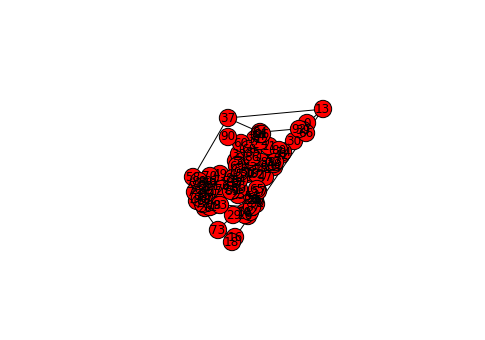

In [8]:
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos)

# Region Enumeration
1. Find a cycle basis, containing $c$ cycles
1. iterate over the $2^{c}-1$ distinct, non-empty Eulerian subgraphs (do this by iterating over the powerset of the cycle basis and finding the symmetric difference of that powerset-element's elements.
  1. check the subgraph for several conditions.    If these conditions are satisfied, we claim that the subgraph is a simply connected region.
    1. Each vertex in the subgraph has degree 2
    1. The edges of the complete graph on the vertices of the subgraph intersect only edges in the subgraph (and no other edges from the graph)

In [7]:
def powerset(iterable):
    """
    Enumerate all non-empty subsets of an iterable.
    For example: powerset([1,2,3]) --> (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    """
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1,1))

def symmetric_difference_graph(cycle_tuple,graph):
    """
    Given a tuple of lists of nodes, cycle_tuple, an element from the
    powerset of the cycle basis of a given graph, G, where each list
    in the given tuple represents a cycle of its contained nodes, return
    the graph defined by the symmetric difference of the cycles
    represented by the input tuple's lists.
    """
    G = nx.Graph()
    
    for cycle in cycle_tuple:
        cycle_length = len(cycle)
        cycle_edges = [(cycle[idx],cycle[idx+1]) for idx in range(cycle_length-1)]
        # Close the loop
        cycle_edges.append((cycle[cycle_length-1],cycle[0]))
        
        for edge in cycle_edges:
            i,j = edge
            if G.has_edge(i,j):
                G.remove_edge(i,j)
            else:
                G.add_edge(i,j)
    
    # position the nodes in the symmetric difference graph
    nx.set_node_attributes(G,'pos',{node:(nx.get_node_attributes(graph,'pos'))[node] for node in nx.nodes(G)})
    
    return G

# def union(cycle_tuple):

def difference_graph_subgraph(graph,subgraph):
    """
    (should probably be combined with symmetric_difference_graph function) return a subgraph of graph resulting from the removal of edges in cycle from graph
    """
    
    G = nx.Graph()
    G.add_edges_from(graph.edges())
    G.remove_edges_from(subgraph.edges())
    H = nx.Graph()
    H.add_edges_from(G.edges())
    return H
    

class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

def ccw(A,B,C):
    return (C.y-A.y) * (B.x-A.x) > (B.y-A.y) * (C.x-A.x)

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

def edge_intersection(edge1,edge2,graph):
    if edge1[0] != edge2[0] and edge1[0] != edge2[1] and edge1[1] != edge2[0] and edge1[1] != edge2[1]:
        pos = nx.get_node_attributes(graph,'pos')
        A = Point(pos[edge1[0]][0],pos[edge1[0]][1])
        B = Point(pos[edge1[1]][0],pos[edge1[1]][1])
        C = Point(pos[edge2[0]][0],pos[edge2[0]][1])
        D = Point(pos[edge2[1]][0],pos[edge2[1]][1])
        return intersect(A,B,C,D)
    return False

def check_for_regionness(subgraph,graph):
    """
    Given a subgraph and its containing graph (each of which has position data),
    determine whether the subgraph encloses a single, simply connected region in
    the current layout of the graph.
    """
    # Is subgraph connected?
    if nx.number_connected_components(subgraph) != 1:
        return False
    
    # Does each node in subgraph have degree 2?
    for node in subgraph.nodes():
        if subgraph.degree(node) != 2:
            return False
    
    # Does each edge in subgraph intersect only subgraph edges (and no other edges in graph)?
    # This will fail for many non-convex regions, though
    pos = nx.get_node_attributes(graph,'pos')
    for subgraph_edge in combinations(subgraph.nodes(),2):
        for graph_edge in (difference_graph_subgraph(graph,subgraph)).edges():
            if edge_intersection(subgraph_edge,graph_edge,graph):
                return False
    return True

for subset_cycle_basis in powerset(nx.cycle_basis(G)):
    #print("TESTING:",(symmetric_difference_graph(subset_cycle_basis,G)).edges())
    if check_for_regionness(symmetric_difference_graph(subset_cycle_basis,G),G):
        print("Yo got dat face:",(symmetric_difference_graph(subset_cycle_basis,G)).edges())
        print(subset_cycle_basis)

Yo got dat face: [(11, 4), (11, 29), (4, 13), (29, 13)]
([4, 11, 29, 13],)
Yo got dat face: [(11, 19), (11, 29), (19, 29)]
([19, 11, 29],)
Yo got dat face: [(28, 11), (28, 4), (11, 4)]
([4, 28, 11],)
Yo got dat face: [(28, 10), (28, 4), (10, 4)]
([4, 10, 28],)
Yo got dat face: [(5, 22), (5, 23), (22, 23)]
([5, 23, 22],)
Yo got dat face: [(8, 18), (8, 23), (1, 18), (1, 22), (22, 23)]
([18, 8, 23, 22, 1],)
Yo got dat face: [(16, 24), (16, 26), (1, 18), (1, 15), (18, 26), (24, 15)]
([24, 16, 26, 18, 1, 15],)
Yo got dat face: [(1, 18), (1, 22), (18, 8), (5, 22), (5, 23), (23, 8)]
([5, 23, 22], [18, 8, 23, 22, 1])


# Next Steps
1. since there may exist several minmax length triangulations of a face, one could enumerate all such triangulations and find those that are more ideal with respect to:
  1. daily travel
  1. opponent activity
  1. node degree
1. allow for the input of "layer nodes," which will not be included in the triangulation, but as

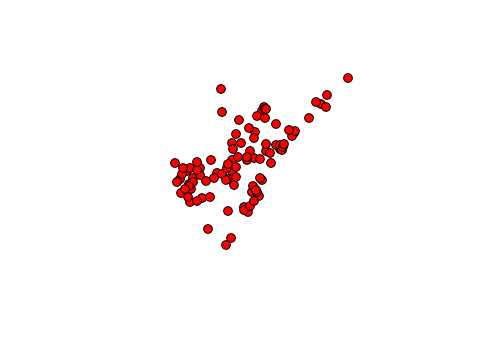

In [9]:
wright.draw()

In [10]:
wright.node_labels

{'id1436081177062': '204th Graffiti',
 'id1436081203050': '207 St. Station',
 'id1436081219785': '215 St Station',
 'id1436081249244': '215 Street Subway Station',
 'id1436081269757': '225 St Station Train',
 'id1436081282965': "Alexander's Garden",
 'id1436081295648': 'Barber ',
 'id1436081401719': "Bruce's Garden",
 'id1436081439355': 'Carolina Baptist Church',
 'id1436081460351': 'Castle Black Lion',
 'id1436081536916': 'Church of Good Shepherd',
 'id1436081555126': 'Church of Saint Jude',
 'id1436081578516': 'College',
 'id1436081592358': 'Columbia Stadium Gates',
 'id1436081606034': 'Cone Mural',
 'id1436081619761': 'Cooper St Mural',
 'id1436081636248': 'Dig This Mural',
 'id1436081649236': 'Duarte Statue',
 'id1436081662827': 'Dyckman Farmhouse Museum',
 'id1436081676502': 'Emerson Playground',
 'id1436081690819': 'Faces on Face Mural',
 'id1436081707204': 'Father Time',
 'id1436081849483': 'Fountain on Seaman Ave',
 'id1436081869197': 'Fort Washington Park',
 'id1436081910674':